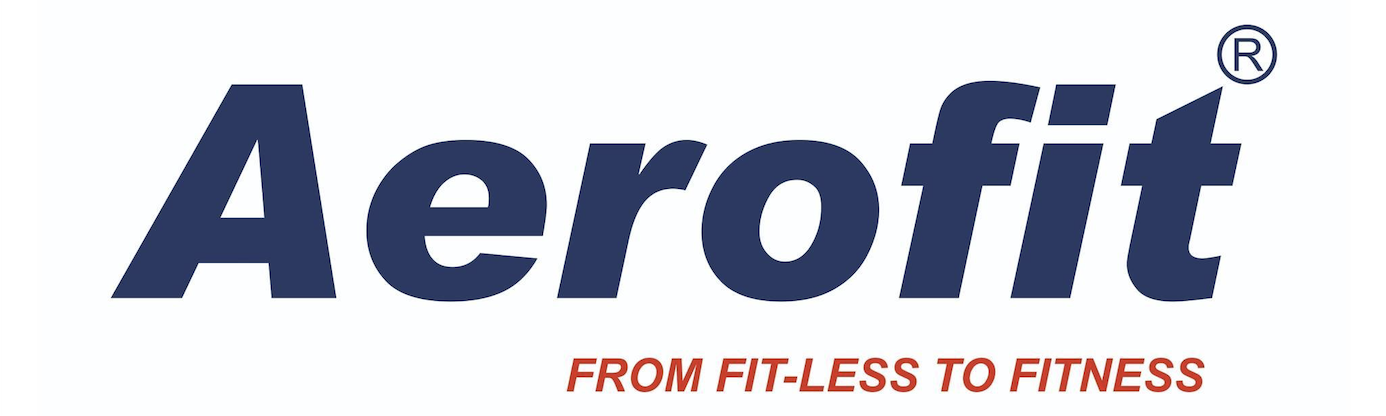

`About Aerofit:`

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

`Business Problem:`

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

`Objective:`

- Create a descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
- For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

`Analyzing Basic Metrics:`

Product Purchased: KP281, KP481, or KP781
Age: In years
Gender: Male/Female
Education: In years
MaritalStatus: Single or partnered
Usage: The average number of times the customer plans to use the treadmill each week.
Income: Annual income (in $)
Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
Miles: The average number of miles the customer expects to walk/run each week

`Data Types:`

- Categorical data: Product, Gender, MaritalStatus
- Numerical data: Age, Education, Usage, Fitness, Income, Miles

`Product Portfolio:`

- The KP281 is an entry-level treadmill that sells for $1,500
  
- The KP481 is for mid-level runners that sell for $1,750
  
- The KP781 treadmill is having advanced features that sell for $2,500

`Exploratory Data Analysis`

In [42]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#loading the dataset
df = pd.read_csv('aerofit_treadmill.csv')
df.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
54,KP281,30,Male,14,Single,3,3,54576,85
70,KP281,38,Male,14,Single,2,3,52302,56
90,KP481,23,Male,16,Partnered,4,3,45480,127
0,KP281,18,Male,14,Single,3,4,29562,112
113,KP481,30,Female,14,Single,3,3,57987,74


`Basic Observations:`

In [44]:
print(f"The dataset is of {df.ndim}-dimensions.")

The dataset is of 2-dimensions.


In [45]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 180 rows and 9 columns.


In [46]:
print(f"The dataset consists of {df.size} elements.")

The dataset consists of 1620 elements.


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [48]:
#Basic statistical summary of numerical columns:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [49]:
#Basic analysis of categorical columns:

df.describe(include = 'object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [50]:
print("DataTypes of each columns:")
df.dtypes

DataTypes of each columns:


Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

`Non-Graphical Analysis:`

In [51]:
print("Number of unique values in each columns:")
for column in df.columns:
    print(f"{column} : {df[column].nunique()}")

Number of unique values in each columns:
Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [52]:
print("Listing unique values in each columns:")
print("-"*50)
for i in df.columns:
    print(f"'{i}': {df[i].unique()}")
    print("-"*50)

Listing unique values in each columns:
--------------------------------------------------
'Product': ['KP281' 'KP481' 'KP781']
--------------------------------------------------
'Age': [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
--------------------------------------------------
'Gender': ['Male' 'Female']
--------------------------------------------------
'Education': [14 15 12 13 16 18 20 21]
--------------------------------------------------
'MaritalStatus': ['Single' 'Partnered']
--------------------------------------------------
'Usage': [3 2 4 5 6 7]
--------------------------------------------------
'Fitness': [4 3 2 1 5]
--------------------------------------------------
'Income': [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  4865

Comment: The data in all columns is consistent with expected values.

`Missing Value & Outlier Detection:`

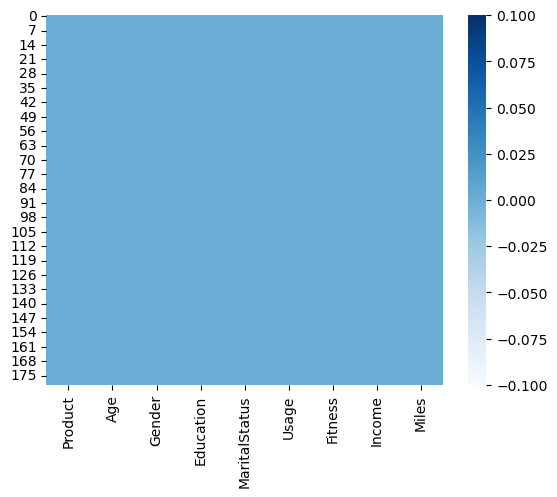

In [53]:
# Heatmap to showcase null values
sns.heatmap(df.isnull(),cmap = "Blues")
plt.show()

Comment: No null values present in this dataset.

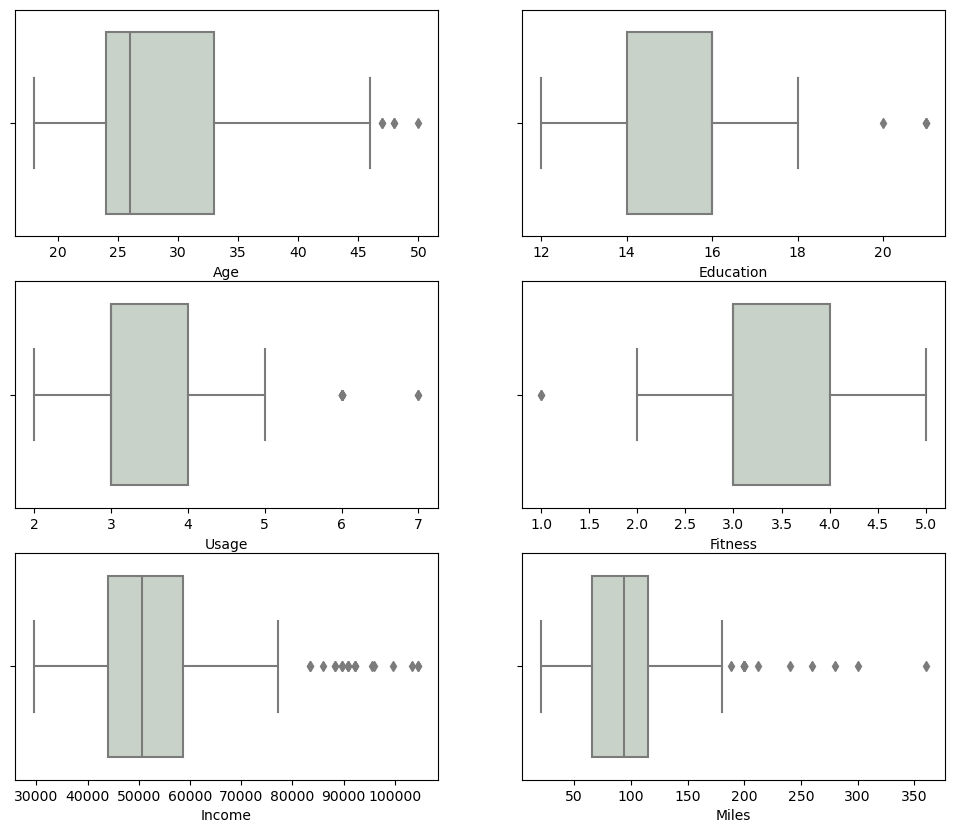

In [54]:
# Boxplot for outlier check

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

sns.boxplot(data=df, x="Age", color='#C6D4C6', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', color='#C6D4C6', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', color='#C6D4C6', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', color='#C6D4C6', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', color='#C6D4C6', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', color='#C6D4C6', ax=axis[2,1])
plt.show()

Observation: 
- The distribution of Age, Education, and Usage exhibits minimal outliers. In contrast, Income and Miles contain a significant number of outliers.

`Univariate Analysis`

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

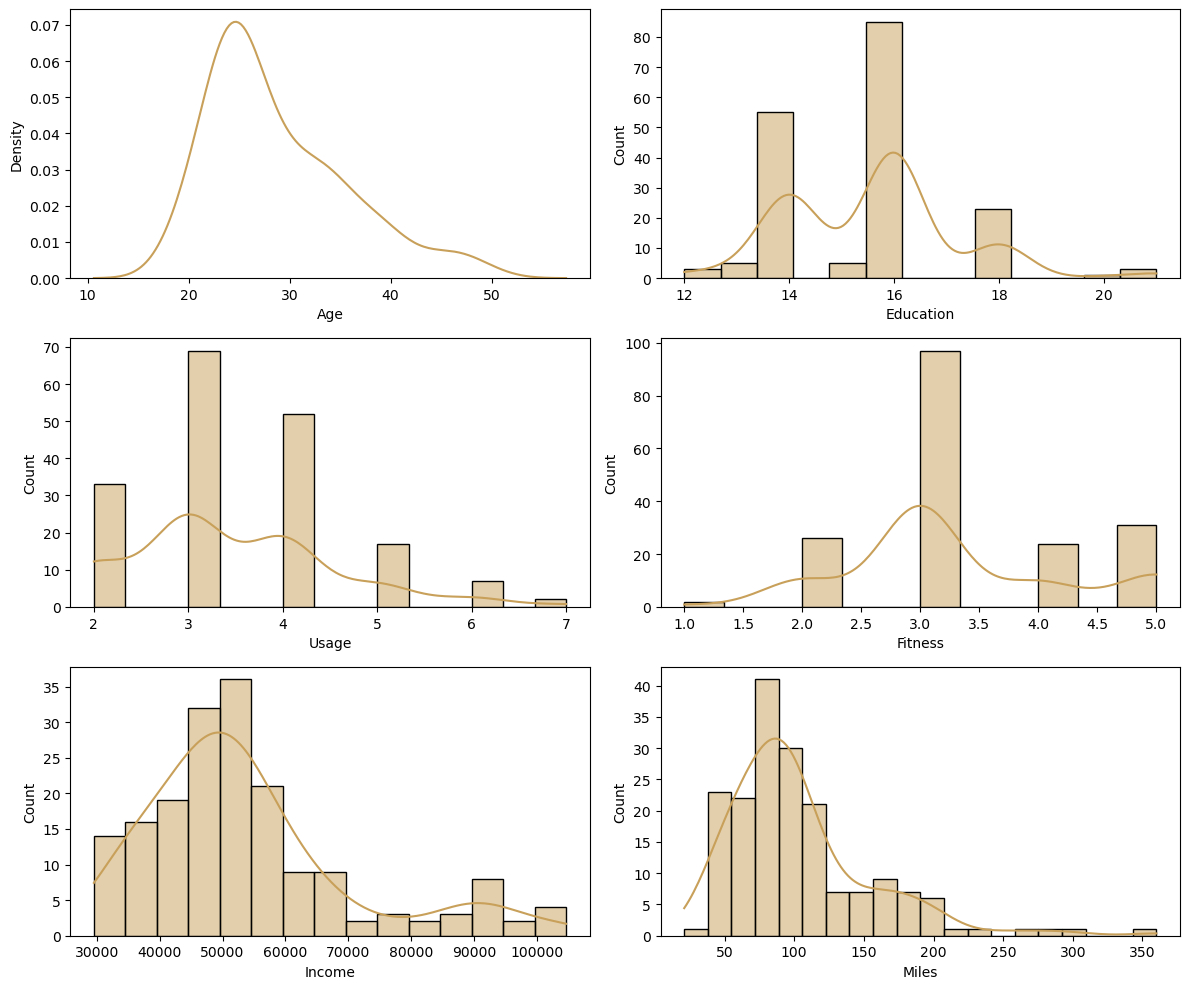

In [55]:
# Using histplot to understand the distribution of the data for continuous variables.

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
sns.kdeplot(data=df, x="Age", color='#C8A05A', ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, color='#C8A05A', ax=axis[0][1])
sns.histplot(data=df, x="Usage", kde=True, color='#C8A05A', ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, color='#C8A05A', ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, color='#C8A05A', ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, color='#C8A05A', ax=axis[2,1])
plt.tight_layout()
plt.show()

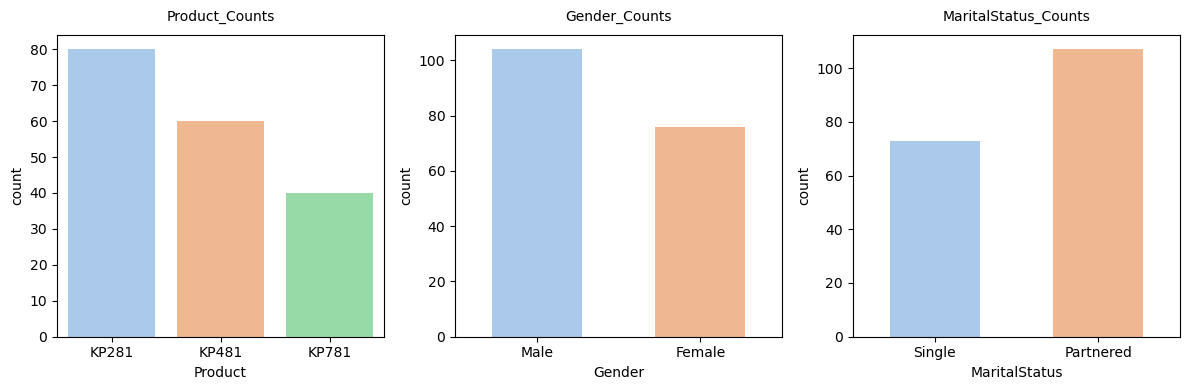

In [56]:
# Using countplot to understand the distribution of the data for the qualitative attributes:

custom_palette = sns.color_palette('pastel')
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
sns.countplot(data=df, x='Product', palette=custom_palette, width=0.8, ax=axis[0])
sns.countplot(data=df, x='Gender', palette=custom_palette, width=0.55, ax=axis[1])
sns.countplot(data=df, x='MaritalStatus', palette=custom_palette, width=0.55, ax=axis[2])

axis[0].set_title("Product_Counts", pad=10, fontsize=10)
axis[1].set_title("Gender_Counts", pad=10, fontsize=10)
axis[2].set_title("MaritalStatus_Counts", pad=10, fontsize=10)
plt.tight_layout()
plt.show()

Obervations:
- KP281 is the predominant product among all others.
- The male population in the data exceeds the female population.
- There is a higher product purchase rate among partnered customers compared to single customers.

`Bivariate Analysis`

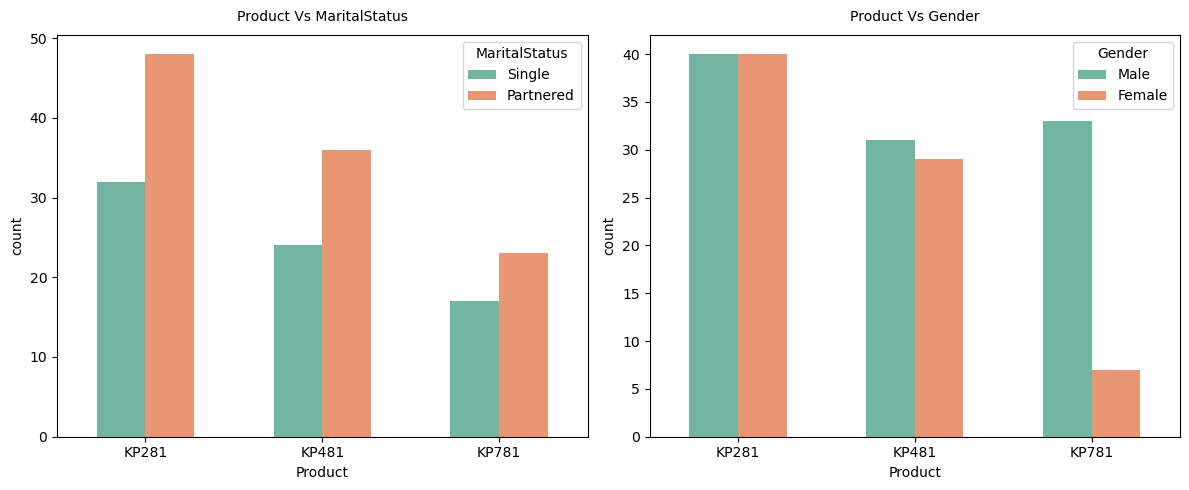

In [57]:
# Using countplot to check if features like MaritalStatus, Gender have any effect on the Product purchased.

custom_palette = sns.color_palette('Set2')
fig = plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.countplot(data=df, x="Product", hue="MaritalStatus", palette=custom_palette, width=0.55)
plt.title("Product Vs MaritalStatus", pad=10, fontsize=10)

plt.subplot(1,2,2)
sns.countplot(data=df, x="Product", hue="Gender", palette=custom_palette, width=0.55)
plt.title("Product Vs Gender", pad=10, fontsize=10)

plt.tight_layout()
plt.show()

Observations:

1. Product Versus MaritalStatus:
- Partnered customers have majorly contributed to purchase of all three products.
- Product 'KP281' is highly saled product among both Single and Partnered customers.

2. Product Versus Gender:
- Male customers exhibit higher purchase rates across all product categories compared to female customers.
- Within the female customer segment, Product KP281 is the most popular choice.

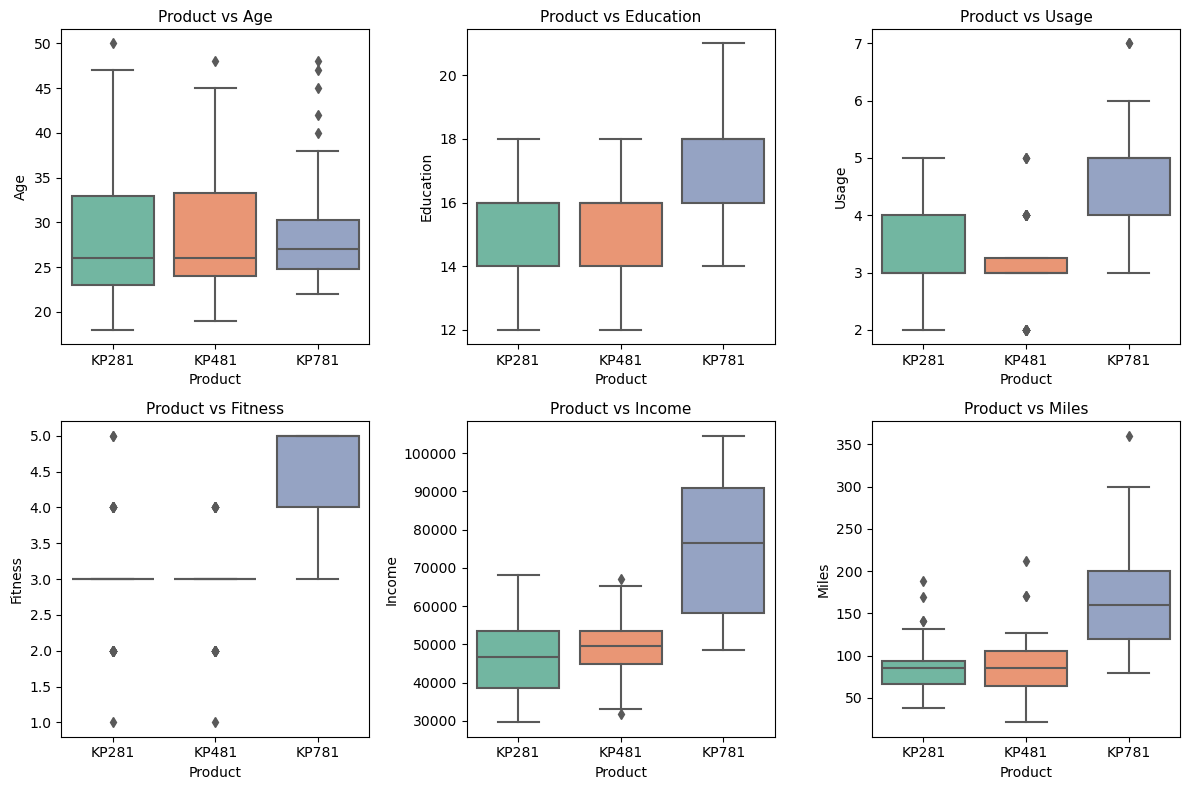

In [58]:
# Using boxplot to understand the distribution of continuous data on Product purchased.

attribute = ['Age','Education','Usage','Fitness','Income','Miles']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
count = 0

for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attribute[count], palette='Set2', ax=axis[i][j])
        axis[i][j].set_title(f"Product vs {attribute[count]}", pad=5, fontsize=11)
        count += 1
plt.tight_layout()
plt.show()

Observations:

1. Product vs. Age
- Customers purchasing KP281 and KP481 exhibit a similar median age.
- The age demographic of 25-30 is strongly associated with the purchase of KP781.
- KP781 exhibits a higher frequency of data points outside the expected range compared to KP281 and KP481.

2. Product vs. Education
- Individuals with an education level exceeding 16 years are more inclined to purchase KP781.
- Customers with less than 16 years of education demonstrate a similar preference for KP281 and KP481.

3. Product vs. Usage
- Frequent treadmill users (more than 4 times a week) predominantly opt for KP781.
- Customers with less frequent treadmill usage tend to choose between KP281 and KP481.

4. Product vs. Fitness
- A higher fitness level (fitness score of 3 or above) correlates with a higher likelihood of purchasing KP781.
- The distribution of fitness scores for KP281 and KP481 is relatively narrow, with most data points clustering around the median.
- There are some outliers present for KP281 and KP481. Product KP781 has no apparent outliers.

5. Product vs. Income
- The median income for KP281 is the lowest, followed by KP481, and KP781 has the highest median income.
- Customers with a higher income (at least 60,000) are more likely to select KP781.

6. Product vs. Miles
- Individuals expecting to cover more than 120 miles per week through walking or running show a preference for KP781.
- The median miles for KP281 is the lowest, followed by KP481, and KP781 has the highest median miles.

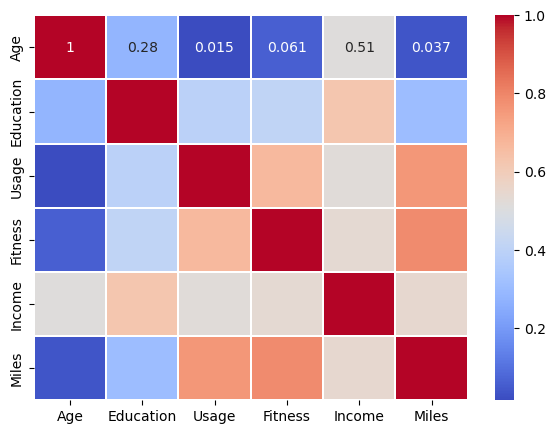

In [59]:
# Using heatmap to check correlation among different factors.

numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(7, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidth=.10)
plt.show()

Observations:

1. Strong Positive Correlation:
- Fitness and Usage: There's a strong positive correlation between Fitness and Usage, suggesting that people with higher fitness levels tend to use the product more frequently.
- Income and Miles: A similar strong positive relationship exists between Income and Miles, implying that people with higher incomes tend to cover more miles.

2. Moderate Positive Correlation:
- Age and Income: There seems to be a moderate positive correlation between Age and Income, suggesting that older individuals tend to have higher incomes.
- Education and Income: A similar moderate positive correlation is observed between Education and Income.

3. Weak or No Correlation:
- Most other variables show weak or no correlation with each other, indicating independent relationships.

`Computing Marginal & Conditional Probabilities`

In [66]:
# Representing marginal probability using 'pd.crosstab' 
# - what percent of customers have purchased KP281, KP481, or KP781
# - what percent of Male and Female customers are present

pd.crosstab(index=df['Gender'], columns = df['Product'], normalize = True)

Product,KP281,KP481,KP781
Gender,,,
Female,0.222222,0.161111,0.038889
Male,0.222222,0.172222,0.183333


In [61]:
# Manually calculating marginal probability

print(" ")
product_list = list(df['Product'].unique())
print('Marginal Probability of each Product:\n')
for i in product_list:
    res = len(df[df['Product'] == i])/len(df)
    print(f"P({i}) = {np.round(res,3)}")
print(" ")

 
Marginal Probability of each Product:

P(KP281) = 0.444
P(KP481) = 0.333
P(KP781) = 0.222
 


In [62]:
print(" ")
print('Marginal Probability of each Gender:\n')
for i in ['Male','Female']:
    res = len(df[df['Gender'] == i])/len(df)
    print(f"P({i}) = {np.round(res,3)}")
print(" ")

 
Marginal Probability of each Gender:

P(Male) = 0.578
P(Female) = 0.422
 


In [63]:
print(" ")
print('Marginal Probability of each MaritalStatus:\n')
for i in ['Single','Partnered']:
    res = len(df[df['MaritalStatus'] == i])/len(df)
    print(f"P({i}) = {np.round(res,3)}")
print(" ")

 
Marginal Probability of each MaritalStatus:

P(Single) = 0.406
P(Partnered) = 0.594
 


Observations from Marginal Probability:
1. Skwed Product Distribution:
- The product distribution is skewed towards KP281, which is the most popular product with 44.4% of the market share, KP481 follows with 33.3%, and KP781 has the lowest market share at 22.2%. This indicates a clear preference for the lower-tier products.

2. Gender Imbalance:
- There is a gender imbalance in the customer base, with males representing a larger portion (57.8%) compared to females (42.2%).

3. Dominance of Partnered Customers:
- The customer base is predominantly composed of partnered individuals (59.4%), with single customers accounting for the remaining 40.6%.

`Conditional Probability`

In [64]:
# Calculating the probability of gender-based customer buying a each product

print(" ")
gender = list(df['Gender'].unique())
product = list(df['Product'].unique())

for i in gender:
    for j in product:
        gender_and_product = len(df[(df['Gender'] == i) & (df['Product'] == j)])
        gender_total = len(df[df['Gender'] == i])
        print(f"P({j}/{i}) = {round((gender_and_product/gender_total), 2)}")
    print(" ")

 
P(KP281/Male) = 0.38
P(KP481/Male) = 0.3
P(KP781/Male) = 0.32
 
P(KP281/Female) = 0.53
P(KP481/Female) = 0.38
P(KP781/Female) = 0.09
 


In [65]:
# Calculating the probability of martialstatus-based customer buying a each product

print(" ")
status = list(df['MaritalStatus'].unique())
product = list(df['Product'].unique())

for i in status:
    for j in product:
        status_and_product = len(df[(df['MaritalStatus'] == i) & (df['Product'] == j)])
        status_total = len(df[df['MaritalStatus'] == i])
        print(f"P({j}/{i}) = {round((status_and_product/status_total), 2)}")
    print(" ")

 
P(KP281/Single) = 0.44
P(KP481/Single) = 0.33
P(KP781/Single) = 0.23
 
P(KP281/Partnered) = 0.45
P(KP481/Partnered) = 0.34
P(KP781/Partnered) = 0.21
 


Observations from Conditional Probability:

1. Product Preferences by Gender:
- Male customers have a relatively balanced preference across all three products, with slight variations.
- Female customers exhibit a strong preference for KP281, followed by KP481, with a significantly lower preference for KP781.

2. Product Preferences by Marital Status:
- Both single and partnered customers show a similar preference pattern, with KP281 being the most preferred product followed by KP481 and then KP781.
- Preference for KP281 is slightly higher among partnered customers.

``Key Insights``

1. Customer Segmentation:
- Partnered customers are a key demographic for all products.
- Males are the primary customer base.
- Age group 25-30 shows a preference for the higher-tier product (KP781).
- Customers with higher education, income, usage, fitness, and miles are more likely to opt for the higher-tier product.

2. Product Positioning:
- KP281 is a popular choice across demographics, possibly positioned as an entry-level or budget-friendly option.
- KP781 appeals to a specific customer segment with higher income, education, usage, fitness, and mileage needs. It could be positioned as a premium product.
- KP481 might need repositioning to differentiate it from KP281 and KP781.

3. Potential Opportunities:
- Targeted Marketing: Develop campaigns targeting specific customer segments based on demographics, product usage, and lifestyle.
- Product Bundling: Create product bundles tailored to different customer needs and preferences.
- Product Line Expansion: Consider expanding the product line to cater to niche markets or address specific customer needs.
- Customer Loyalty Programs: Implement loyalty programs to encourage repeat purchases and gather valuable customer data.

``Strategic Recommendations``

1. Target Specific Customer Segments:
- Focus on Partnered Customers: This segment contributes significantly to overall sales.
- Target Males: Given the higher purchase rates among males, tailor marketing efforts accordingly.
- Identify the 25-30 Age Group: This age group shows a preference for KP781. Tailor marketing and product features to this demographic.
- Target High-Income Individuals: This group is more likely to purchase the higher-tier product, KP781.

2. Product Positioning:
- Position KP781: Emphasize its features for high-usage, high-fitness, and high-income customers.
- Reposition KP281 and KP481: Consider positioning these products as entry-level or budget-friendly options.

3. Marketing and Sales:
- Targeted Marketing: Develop marketing campaigns tailored to specific customer segments.
- Product Bundling: Create product bundles based on customer segments (e.g., bundled products for partnered customers).
- Customer Education: Educate customers about the benefits of different products based on their needs and lifestyles.

4. Product Development:
- Expand Product Line: Consider developing new products to cater to specific customer segments, such as a product focused on low-impact workouts.
- Product Enhancements: Based on customer feedback, enhance product features to meet customer needs better.